Muhammad Hassaan Azam

AI/ML Intern

DHC 831

# Task 1: Financial Time-Series Anomaly Detection

## Stock Market Data Extraction

Downloading yfinance library to extract data for analysis

In [1]:
pip install -q yfinance

### Single Files

Download 5 year dataset of 3 different Companies which are NVIDIA, TESLA and META from 2020 to 2024

In [2]:
import yfinance as yf
import pandas as pd

# Download historical data
tickers = ['NVDA', 'TSLA', 'META']  # Example companies
data = yf.download(tickers, start="2020-01-01", end="2024-12-31")
# print(data)

[*********************100%***********************]  3 of 3 completed


In [3]:
for ticker in tickers:
    try:
        df = data.xs(ticker, level=1, axis=1)  # Extract all columns for the ticker
        df.to_csv(f'{ticker}_5yearsData.csv')
        print(f"Saved {ticker}__5yearsData.csv successfully.")
    except KeyError as e:
        print(f"Error processing {ticker}: {e}. Skipping this ticker.")

Saved NVDA__5yearsData.csv successfully.
Saved TSLA__5yearsData.csv successfully.
Saved META__5yearsData.csv successfully.


### Combined Dataset

All download combine dataset for comparison

In [4]:

# Custom column names
custom_names = ['NVIDIA', 'TESLA', 'META']

# Combine all tickers' data into one DataFrame
combined_data = pd.DataFrame()

for ticker, custom_name in zip(tickers, custom_names):
    try:
        # Extract all columns for the specific ticker
        df = data.xs(ticker, level=1, axis=1)

        # Rename columns to include the custom name
        df.columns = [f"{col}" for col in df.columns]

        # Add a 'company_name' column
        df['company_name'] = custom_name

        # Combine with the main DataFrame
        if combined_data.empty:
            combined_data = df
        else:
            combined_data = pd.concat([combined_data, df])

        print(f"Processed {ticker} successfully.")
    except KeyError as e:
        print(f"Error processing {ticker}: {e}. Skipping this ticker.")

# Save the combined data to a single CSV file
combined_data.to_csv('combined_5yearsData.csv', index=True)
print("Saved combined_5yearsData.csv successfully.")

Processed NVDA successfully.
Processed TSLA successfully.
Processed META successfully.
Saved combined_5yearsData.csv successfully.


<ipython-input-4-a048cb010962>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_name'] = custom_name
<ipython-input-4-a048cb010962>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_name'] = custom_name
<ipython-input-4-a048cb010962>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

## Companies Stock Value Comparison

In [ ]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv('combined_5yearsData.csv', parse_dates=['Date'], dayfirst=True)
combined_df.set_index('Date', inplace=True)

# Print the first few rows for each company
print("NVIDIA Data:")
print(combined_df[combined_df['company_name'] == 'NVIDIA'].head())

print("\nTesla Data:")
print(combined_df[combined_df['company_name'] == 'TESLA'].head())

print("\nMeta Data:")
print(combined_df[combined_df['company_name'] == 'META'].head())

NVIDIA Data:
               Close      High       Low      Open     Volume company_name
Date                                                                      
2020-01-02  5.972710  5.972710  5.893293  5.943831  237536000       NVIDIA
2020-01-03  5.877112  5.920929  5.828068  5.852964  205384000       NVIDIA
2020-01-06  5.901757  5.906985  5.757612  5.783752  262636000       NVIDIA
2020-01-07  5.973208  6.019016  5.885077  5.930138  314856000       NVIDIA
2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000       NVIDIA

Tesla Data:
                Close       High        Low       Open     Volume company_name
Date                                                                          
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500        TESLA
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500        TESLA
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000        TESLA
2020-01-07  31.270666  31.441999  30.224001  30.760000

Normalizing data of 3 companies because sometimes the scale of the stock prices can vary significantly between companies, making it difficult to compare them directly on the same graph.

If the stock prices are on different scales (e.g., NVIDIA is in the range of 100-500, while Tesla is in the range of 500-1000), you can normalize the data to make the comparison easier. Normalization scales the data to a range of 0 to 1.

In [ ]:
# Normalize the closing prices for each company
for company in ['NVIDIA', 'TESLA', 'META']:
    company_data = combined_df[combined_df['company_name'] == company]
    combined_df.loc[combined_df['company_name'] == company, 'Close_Normalized'] = (
        company_data['Close'] / company_data['Close'].max()
    )

Plotting NVIDIA Data:
            Close_Normalized
Date                        
2020-01-02          0.040120
2020-01-03          0.039478
2020-01-06          0.039644
2020-01-07          0.040124
2020-01-08          0.040199
Plotting TESLA Data:
            Close_Normalized
Date                        
2020-01-02          0.059776
2020-01-03          0.061547
2020-01-06          0.062732
2020-01-07          0.065166
2020-01-08          0.068373
Plotting META Data:
            Close_Normalized
Date                        
2020-01-02          0.330578
2020-01-03          0.328829
2020-01-06          0.335022
2020-01-07          0.335747
2020-01-08          0.339151


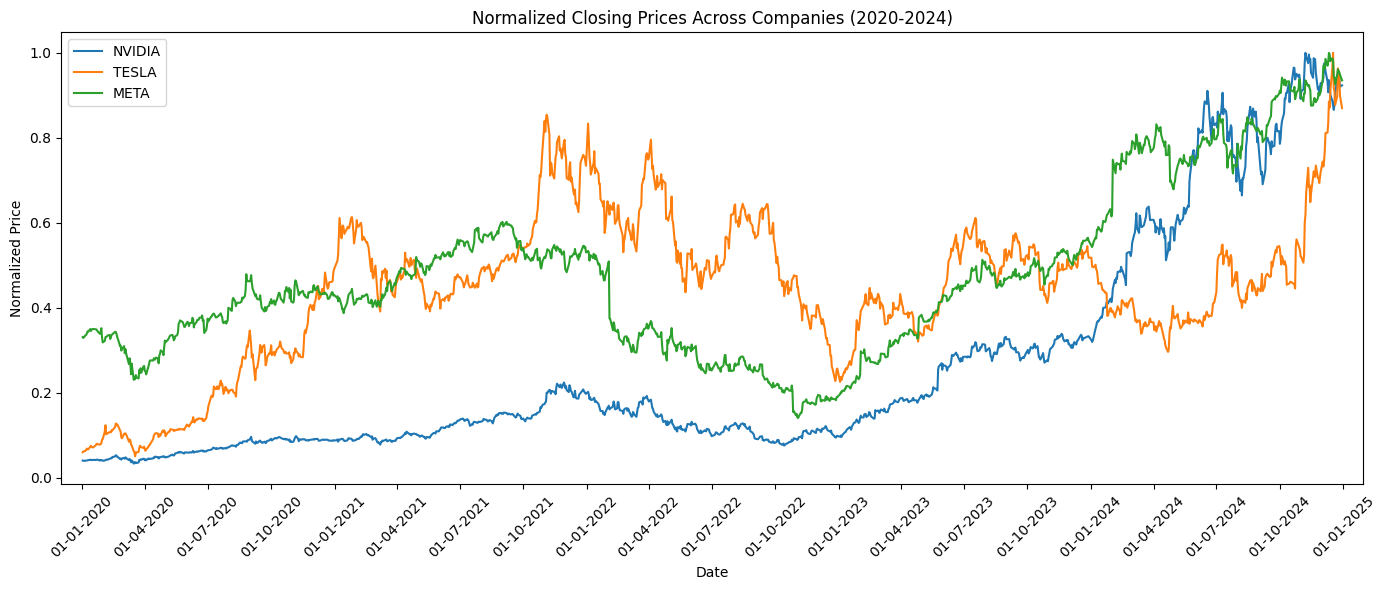

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the index is in datetime format
combined_df.index = pd.to_datetime(combined_df.index)

plt.figure(figsize=(14, 6))
for company in ['NVIDIA', 'TESLA', 'META']:
    company_data = combined_df[combined_df['company_name'] == company]
    print(f"Plotting {company} Data:")
    print(company_data[['Close_Normalized']].head())  # Debug: Print the first few rows
    plt.plot(company_data.index, company_data['Close_Normalized'], label=company)

# Format x-axis to show dates quarterly
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set interval to 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format as 'DD-MM-YYYY'
ax.xaxis_date()  # Force the axis to treat the x values as dates

# Set x-axis limits with buffer
start_date = pd.Timestamp('2020-01-01') - pd.Timedelta(days=30)  # Buffer at the start
end_date = pd.Timestamp('2024-12-31') + pd.Timedelta(days=30)      # Buffer at the end

# Optional: convert limits using date2num if needed
start_num = mdates.date2num(start_date.to_pydatetime())
end_num = mdates.date2num(end_date.to_pydatetime())
plt.xlim(start_num, end_num)

plt.title('Normalized Closing Prices Across Companies (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()


## Trading Volume of Companies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load separate datasets
nvidia_df = pd.read_csv('/content/META_5yearsData.csv', parse_dates=['Date'])
tesla_df = pd.read_csv('/content/TSLA_5yearsData.csv', parse_dates=['Date'])
meta_df = pd.read_csv('/content/TSLA_5yearsData.csv', parse_dates=['Date'])

# Load combined dataset
combined_df = pd.read_csv('/content/combined_5yearsData.csv', parse_dates=['Date'])


In [ ]:
# Basic statistics for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    print(f"Basic Statistics for {company}:")
    display(df.describe())  # Use display() instead of print()
    print("\n")

# Basic statistics for combined dataset
print("Basic Statistics for Combined Dataset:")
combined_df.describe()

Basic Statistics for NVIDIA:


Date        Close         High          Low  \
count                           1257  1257.000000  1257.000000  1257.000000   
mean   2022-06-30 22:13:27.637231616   300.242295   304.300185   296.060906   
min              2020-01-02 00:00:00    88.571663    90.115760    87.754774   
25%              2021-04-01 00:00:00   208.981705   210.794803   205.724145   
50%              2022-06-30 00:00:00   279.761322   284.144607   275.228618   
75%              2023-09-29 00:00:00   344.972260   350.760134   341.874080   
max              2024-12-30 00:00:00   632.170044   637.885465   626.704485   
std                              NaN   124.713439   125.814469   123.529762   

              Open        Volume  
count  1257.000000  1.257000e+03  
mean    300.078644  2.315541e+07  
min      89.737209  4.726100e+06  
25%     208.045257  1.453120e+07  
50%     278.097672  1.938320e+07  
75%     345.310940  2.711680e+07  
max     630.991005  2.323166e+08  
std     124.856234  1.572882e+07



Basic Statistics for TESLA:


Date        Close         High          Low  \
count                           1257  1257.000000  1257.000000  1257.000000   
mean   2022-06-30 22:13:27.637231616   213.279443   218.117130   208.204688   
min              2020-01-02 00:00:00    24.081333    26.990667    23.367332   
25%              2021-04-01 00:00:00   173.860001   177.190002   170.009995   
50%              2022-06-30 00:00:00   220.190002   225.339996   215.330002   
75%              2023-09-29 00:00:00   259.670013   264.896667   254.210007   
max              2024-12-30 00:00:00   479.859985   488.540009   457.510010   
std                              NaN    83.321515    85.225296    81.382769   

              Open        Volume  
count  1257.000000  1.257000e+03  
mean    213.315219  1.255686e+08  
min      24.980000  2.940180e+07  
25%     173.889999  7.600980e+07  
50%     220.916672  1.019936e+08  
75%     259.209991  1.454174e+08  
max     475.899994  9.140820e+08  
std      83.449250  8.210821e+07



Basic Statistics for META:


Date        Close         High          Low  \
count                           1257  1257.000000  1257.000000  1257.000000   
mean   2022-06-30 22:13:27.637231616   213.279443   218.117130   208.204688   
min              2020-01-02 00:00:00    24.081333    26.990667    23.367332   
25%              2021-04-01 00:00:00   173.860001   177.190002   170.009995   
50%              2022-06-30 00:00:00   220.190002   225.339996   215.330002   
75%              2023-09-29 00:00:00   259.670013   264.896667   254.210007   
max              2024-12-30 00:00:00   479.859985   488.540009   457.510010   
std                              NaN    83.321515    85.225296    81.382769   

              Open        Volume  
count  1257.000000  1.257000e+03  
mean    213.315219  1.255686e+08  
min      24.980000  2.940180e+07  
25%     173.889999  7.600980e+07  
50%     220.916672  1.019936e+08  
75%     259.209991  1.454174e+08  
max     475.899994  9.140820e+08  
std      83.449250  8.210821e+07



Basic Statistics for Combined Dataset:


Date        Close         High          Low  \
count                           3771  3771.000000  3771.000000  3771.000000   
mean   2022-06-30 22:13:27.637231360   183.963812   187.164975   180.620254   
min              2020-01-02 00:00:00     4.892426     5.229715     4.500833   
25%              2021-04-01 00:00:00    42.839857    43.556230    42.021927   
50%              2022-06-30 00:00:00   185.919815   190.103813   182.199997   
75%              2023-09-29 00:00:00   270.169067   275.004698   265.896914   
max              2024-12-30 00:00:00   632.170044   637.885465   626.704485   
std                              NaN   140.861704   142.837825   138.831301   

              Open        Volume  
count  3771.000000  3.771000e+03  
mean    183.921665  1.985871e+08  
min       4.984595  4.726100e+06  
25%      42.599165  2.714125e+07  
50%     185.919807  1.026293e+08  
75%     270.698116  3.233472e+08  
max     630.991005  1.543911e+09  
std     140.890884  2.160439e+08

A company's "trading volume" refers to the total number of shares of its stock that are bought and sold within a specific period of time, essentially acting as a measure of how actively the company's stock is being traded on the market; a higher volume indicates greater investor interest and liquidity in the stock.

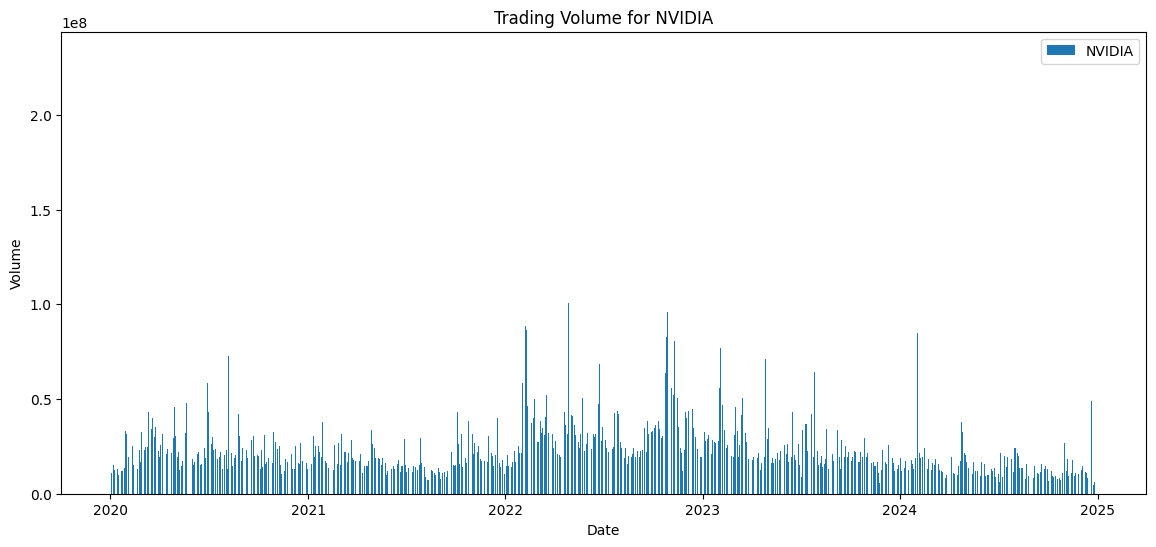

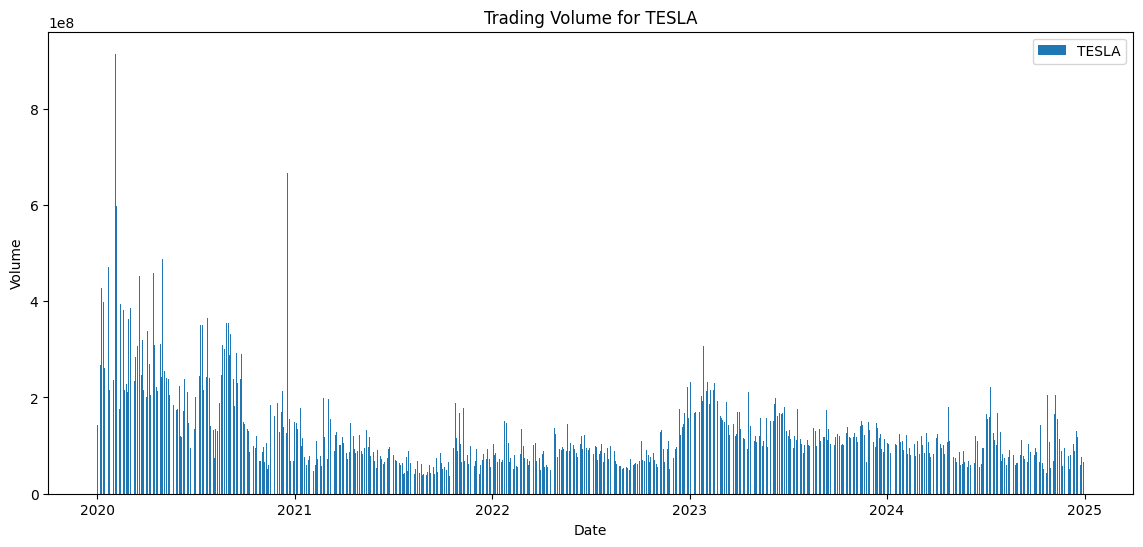

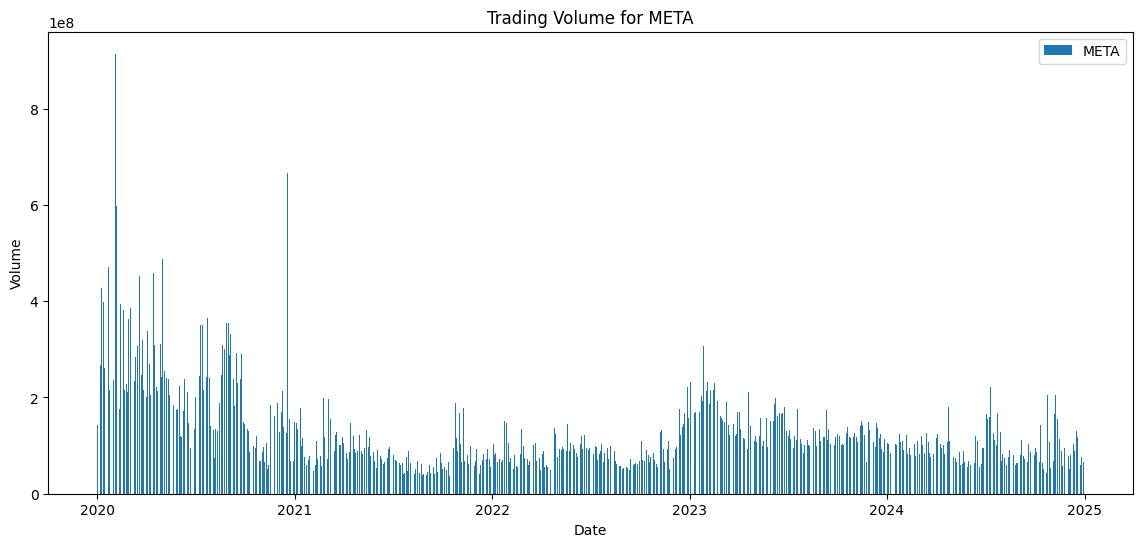

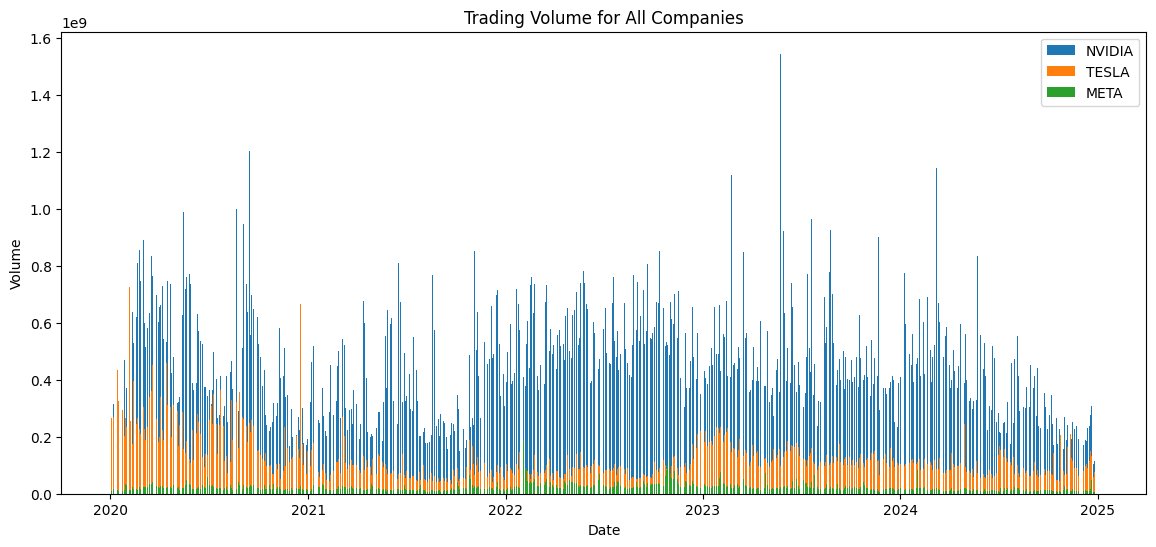

In [ ]:
# Plot volume for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    plt.figure(figsize=(14, 6))
    plt.bar(df['Date'], df['Volume'], label=company)
    plt.title(f'Trading Volume for {company}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# Plot volume for combined dataset
plt.figure(figsize=(14, 6))
for company in combined_df['company_name'].unique():
    company_data = combined_df[combined_df['company_name'] == company]
    plt.bar(company_data['Date'], company_data['Volume'], label=company)
plt.title('Trading Volume for All Companies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


## Financial Indicators

### SMA

Simple Moving Average (SMA)

It is simply the average price over the specified period. The average is called "moving" because it is plotted on the chart bar by bar, forming a line that moves along the chart as the average value changes. SMAs are often used to determine trend direction.

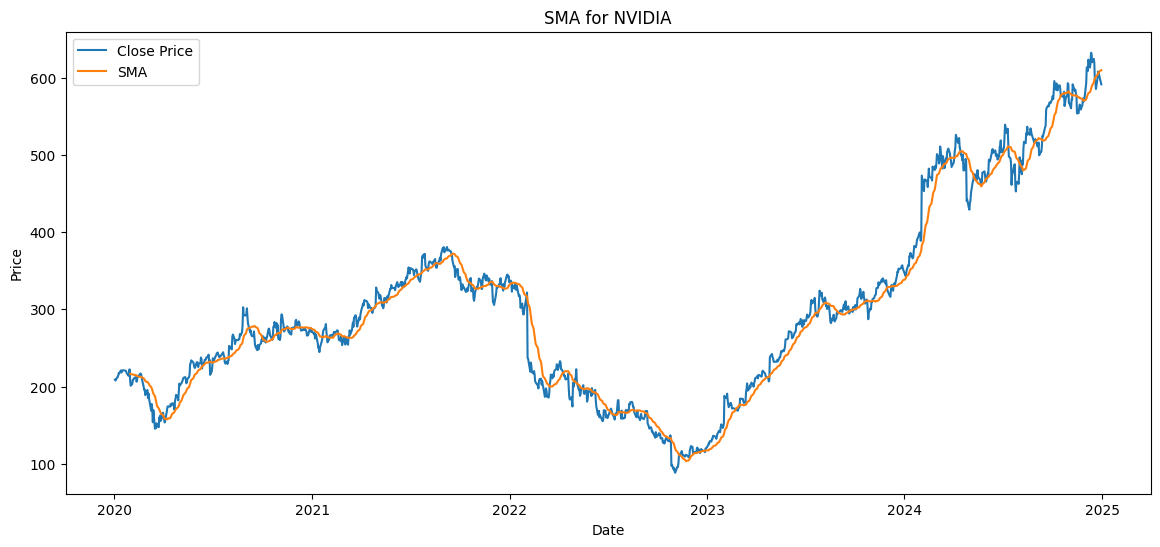

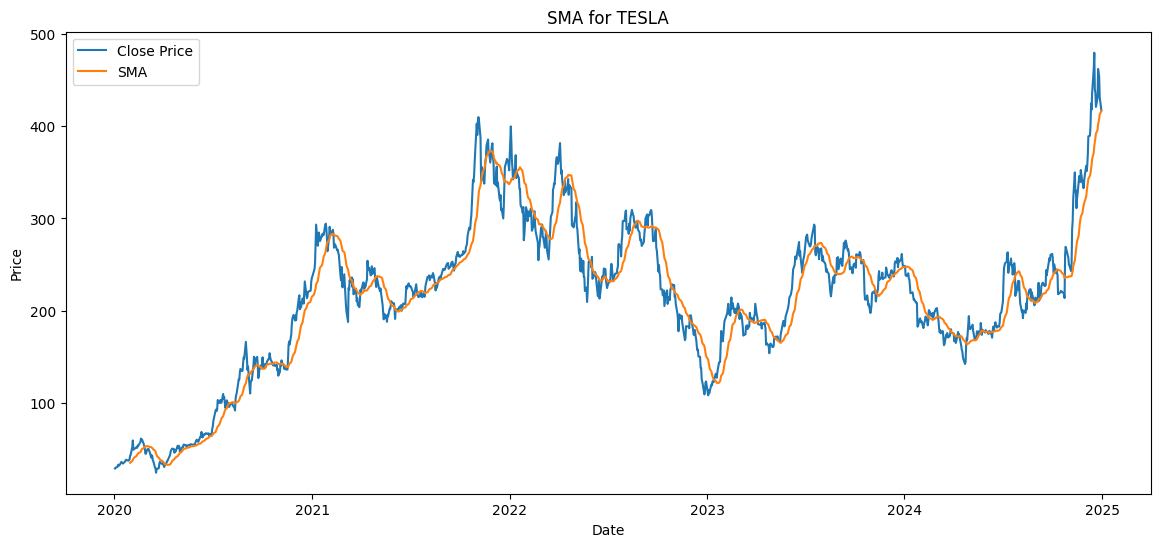

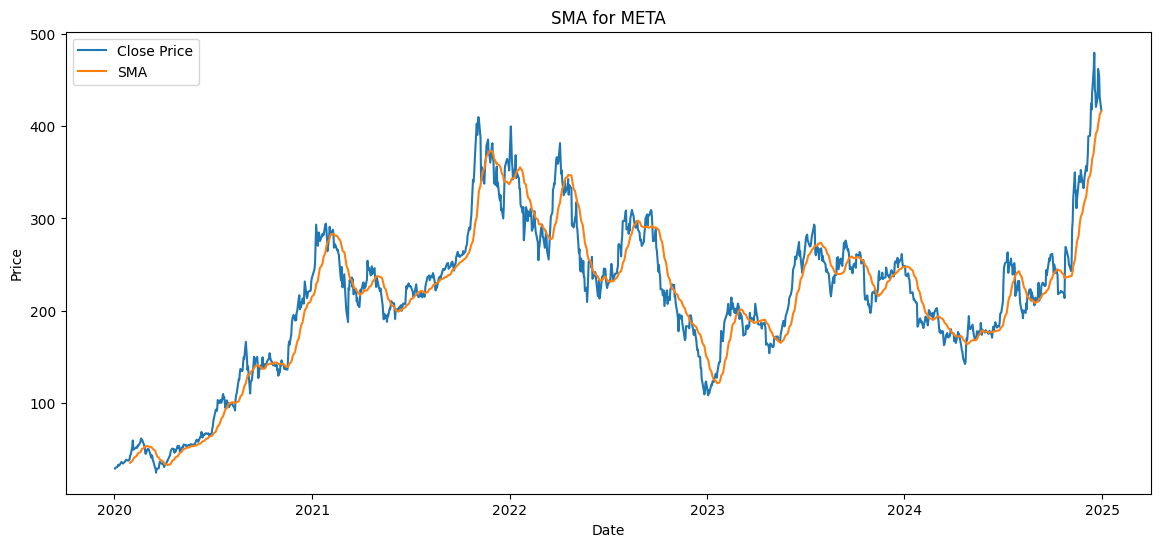

In [ ]:
# Calculate SMA for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    df['SMA'] = df['Close'].rolling(window=20).mean()
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['SMA'], label='SMA')
    plt.title(f'SMA for {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


### EMA

The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment such as a stock or a commodity over time. Like the simple moving average (SMA), the EMA tracks price trends over time.

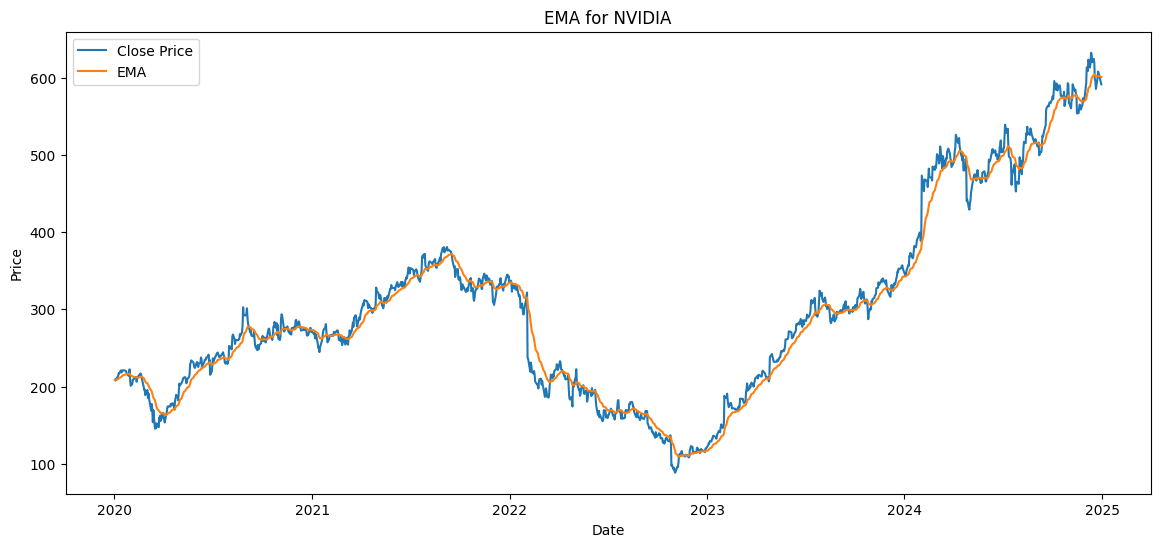

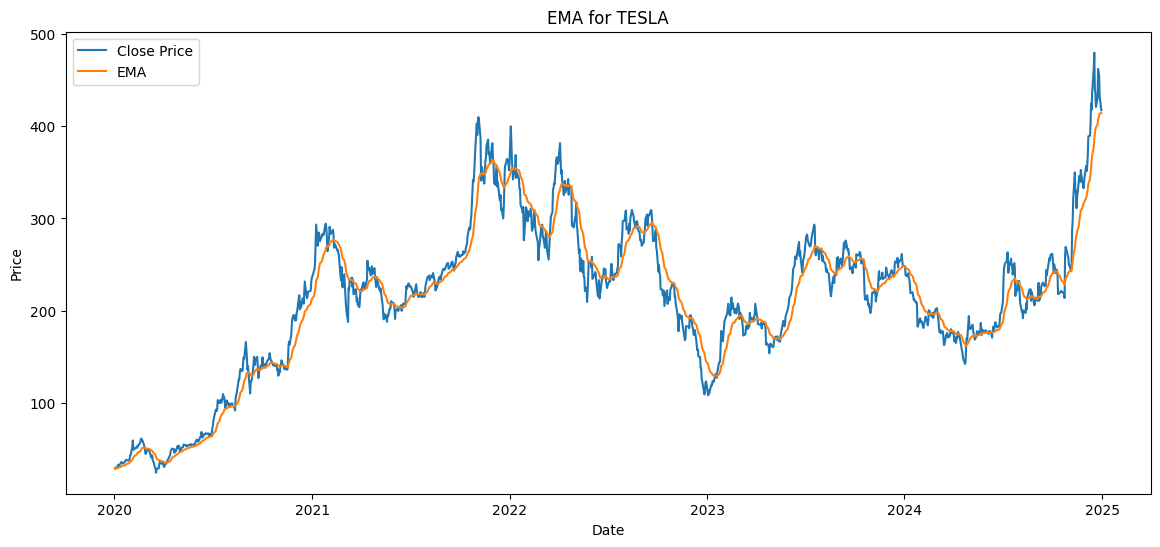

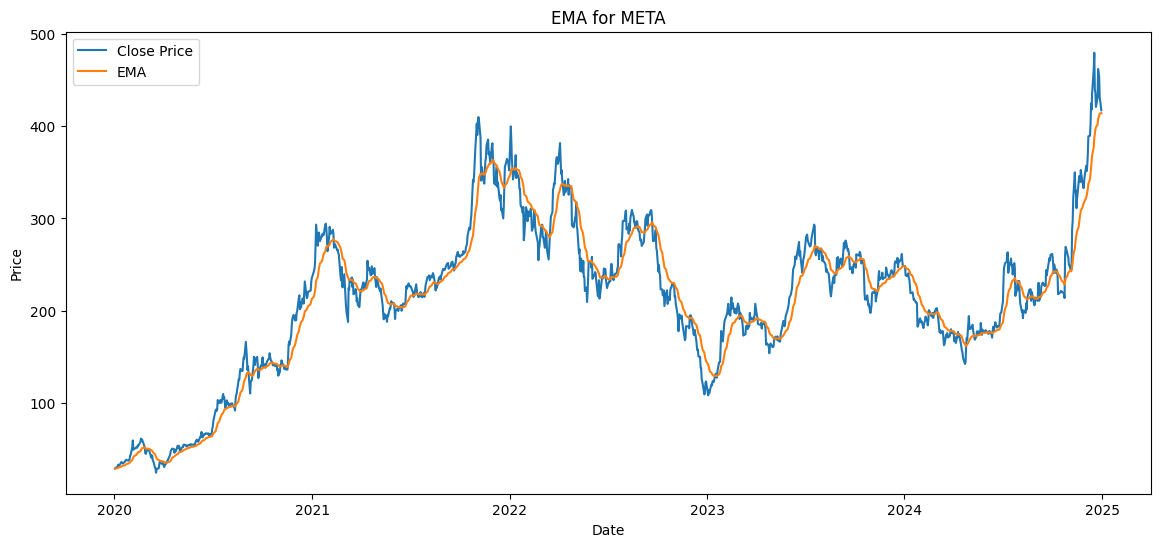

In [ ]:
# Calculate EMA for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['EMA'], label='EMA')
    plt.title(f'EMA for {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


### RSI

The Relative Strength Index (RSI) is a momentum indicator that measures the magnitude of recent price changes to analyze overbought or oversold conditions.

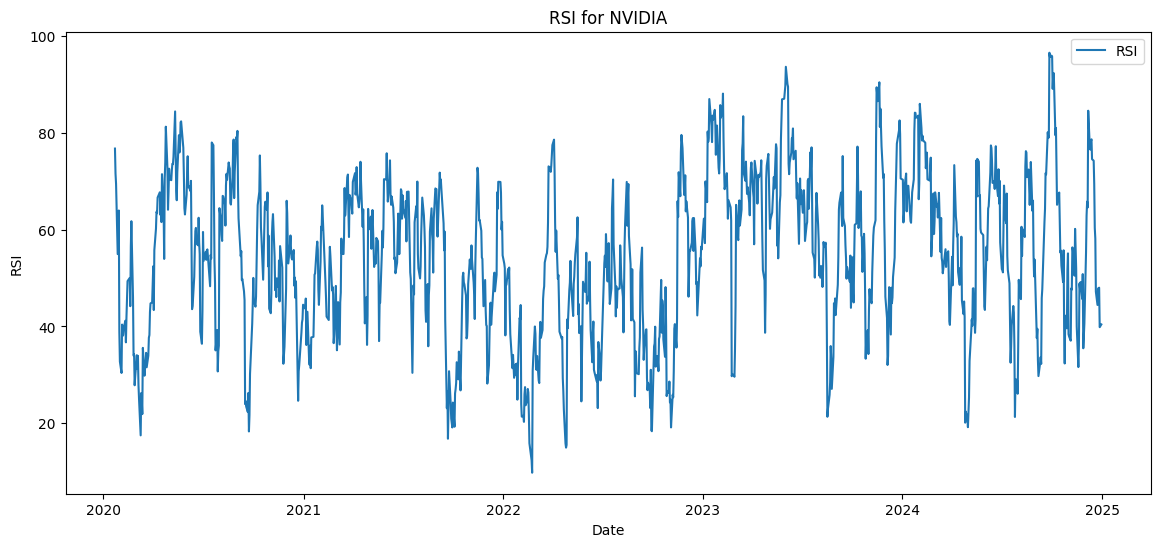

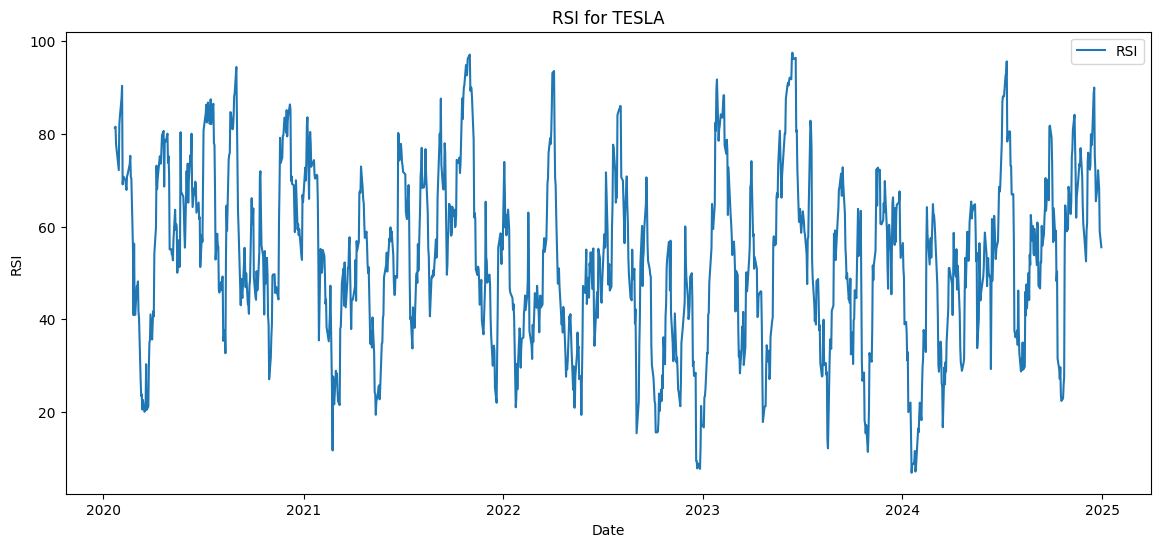

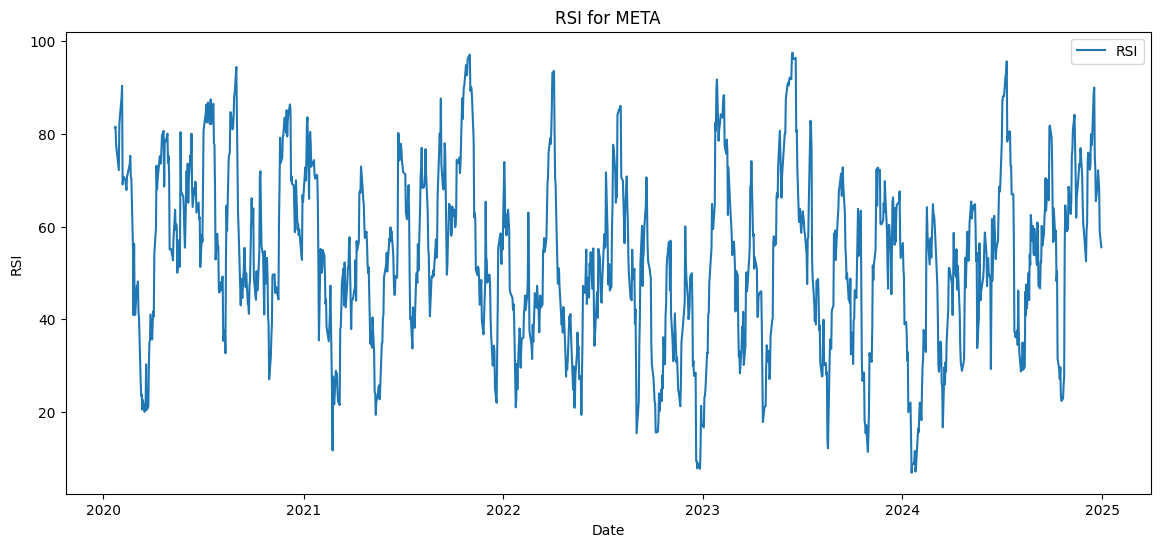

In [ ]:
# Calculate RSI for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['RSI'], label='RSI')
    plt.title(f'RSI for {company}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()


### Bollinger Bands

A Bollinger Bands financial indicator is a technical analysis tool that displays a price range, consisting of a middle band (simple moving average) and upper and lower bands, which are calculated using standard deviations, to visually represent the volatility of a security's price over time, helping traders identify potential overbought or oversold conditions and potential trend changes based on how the price interacts with the bands.

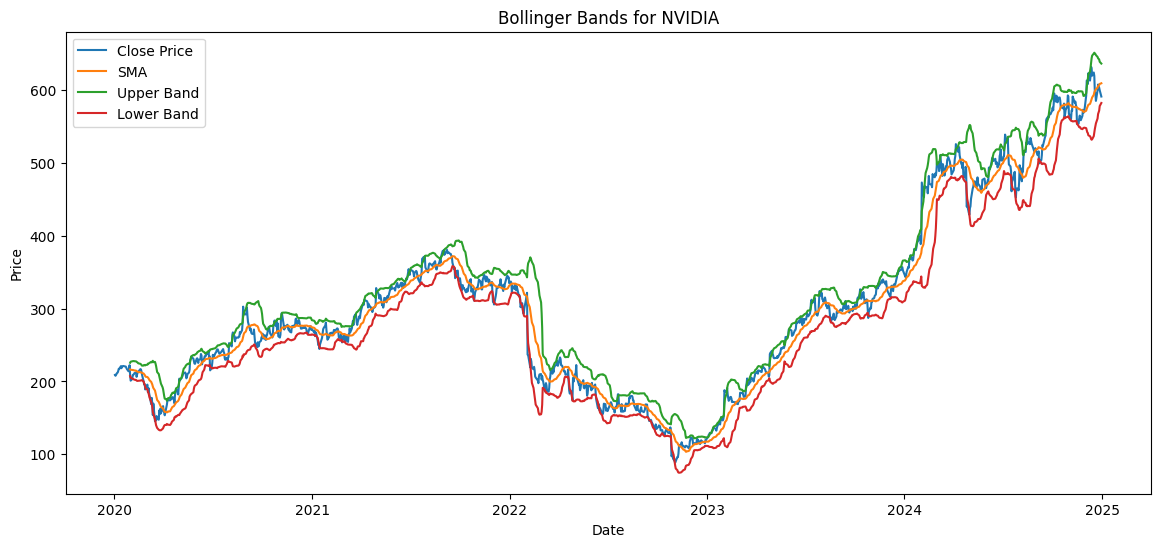

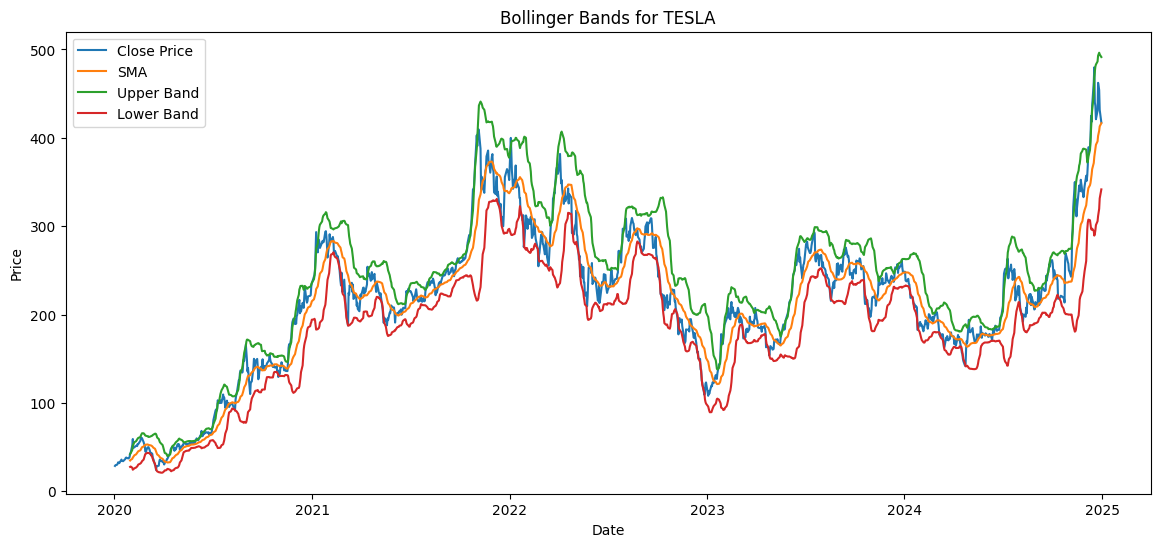

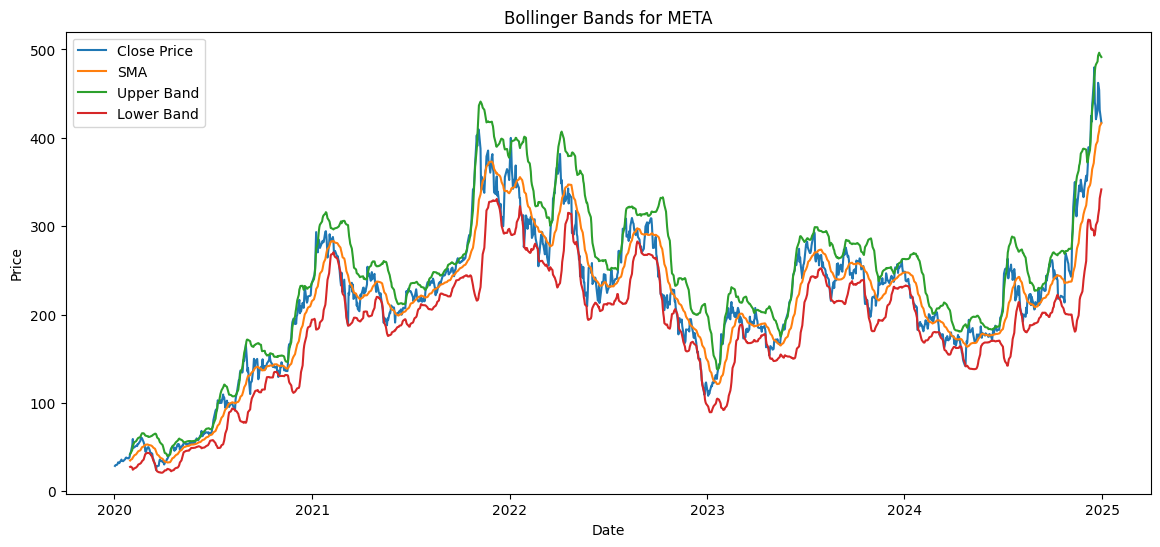

In [ ]:
# Calculate Bollinger Bands for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    df['SMA'] = df['Close'].rolling(window=20).mean()
    df['STD'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA'] + (df['STD'] * 2)
    df['Lower_Band'] = df['SMA'] - (df['STD'] * 2)
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['SMA'], label='SMA')
    plt.plot(df['Date'], df['Upper_Band'], label='Upper Band')
    plt.plot(df['Date'], df['Lower_Band'], label='Lower Band')
    plt.title(f'Bollinger Bands for {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


## Anomaly Detection

Anomaly detection is a critical task for financial market, investors, and regulatory authorities, where conventional methods employ rule-based models. With the development of machine learning and deep learning techniques, it becomes more promising to detect anomalous trading behaviors from data.

### Z Score

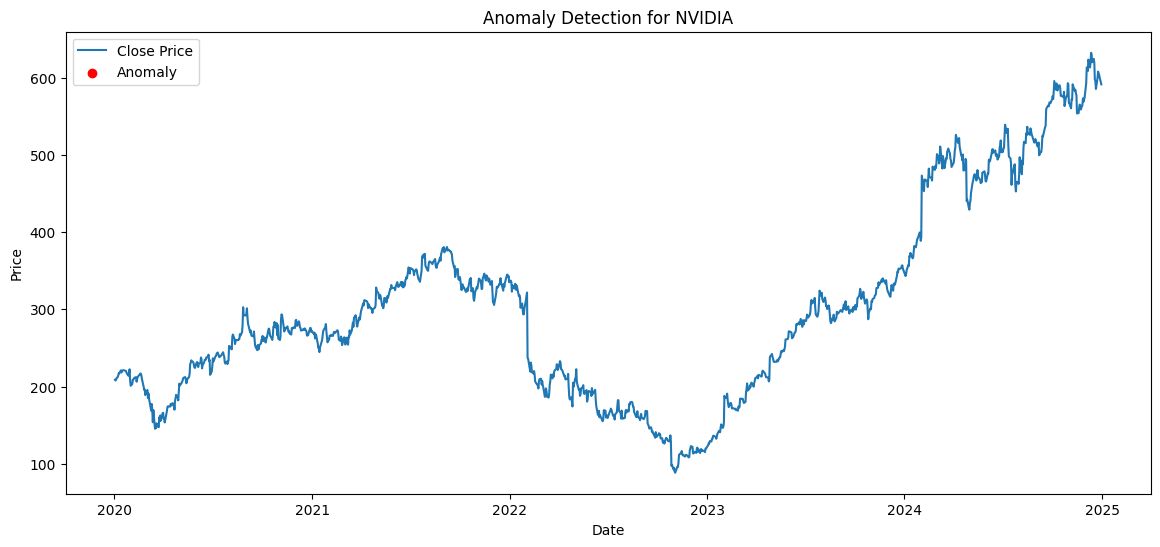

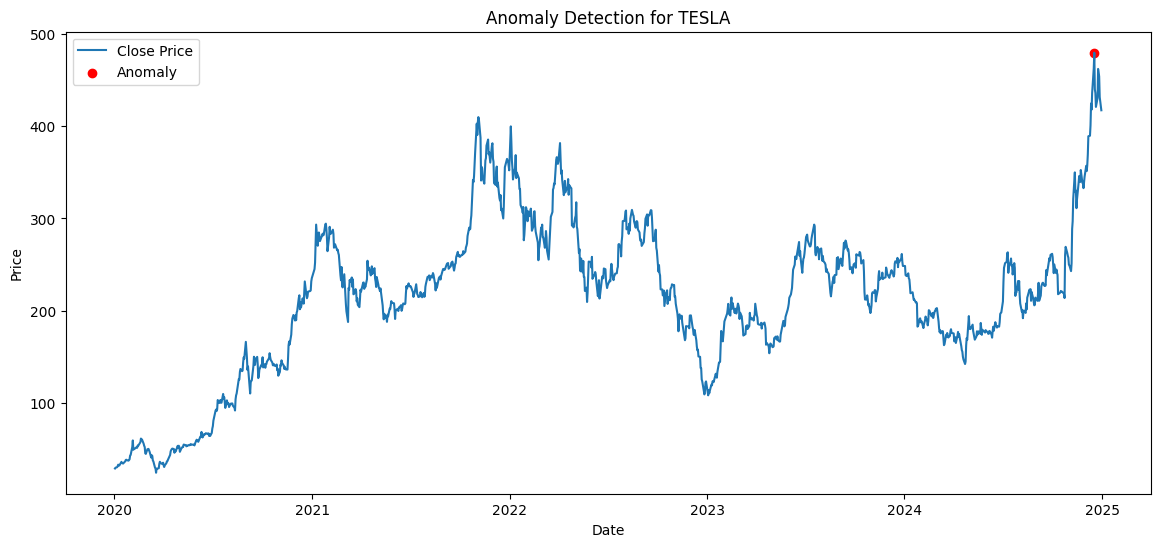

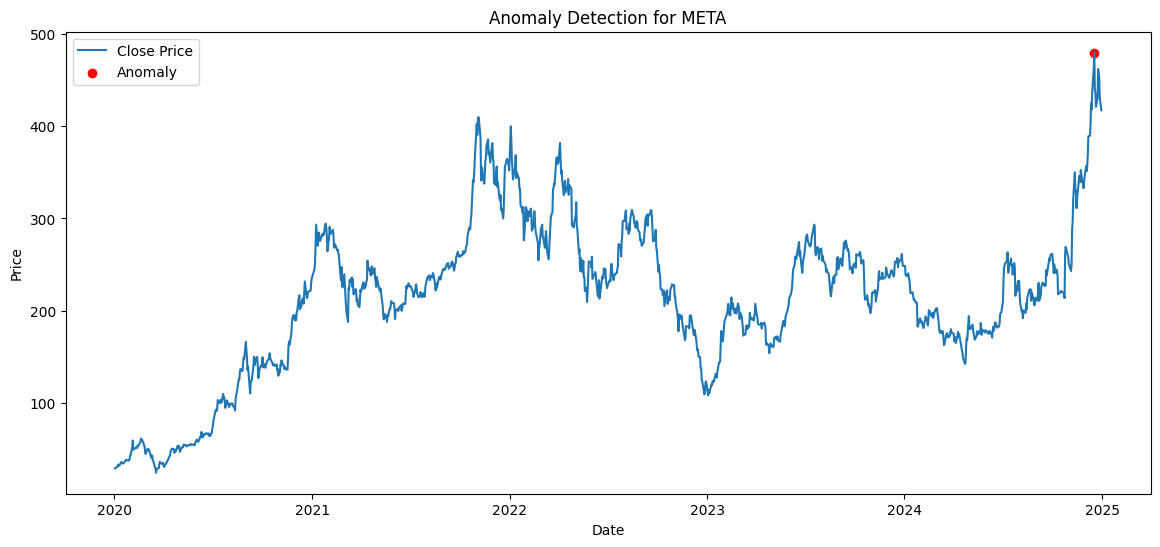

In [ ]:
# Calculate Z-score for separate datasets
for company, df in zip(['NVIDIA', 'TESLA', 'META'], [nvidia_df, tesla_df, meta_df]):
    df['Z_Score'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()
    df['Anomaly'] = df['Z_Score'].apply(lambda x: 1 if abs(x) > 3 else 0)
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.scatter(df[df['Anomaly'] == 1]['Date'], df[df['Anomaly'] == 1]['Close'], color='red', label='Anomaly')
    plt.title(f'Anomaly Detection for {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


### Isolation Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load separate datasets
nvidia_df = pd.read_csv('/content/NVDA_5yearsData.csv', parse_dates=['Date'])
tesla_df = pd.read_csv('/content/TSLA_5yearsData.csv', parse_dates=['Date'])
meta_df = pd.read_csv('/content/META_5yearsData.csv', parse_dates=['Date'])


In [ ]:
def preprocess_data(df):
    # Select relevant features
    features = df[['Close', 'Volume']]
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features

nvidia_scaled = preprocess_data(nvidia_df)
tesla_scaled = preprocess_data(tesla_df)
meta_scaled = preprocess_data(meta_df)


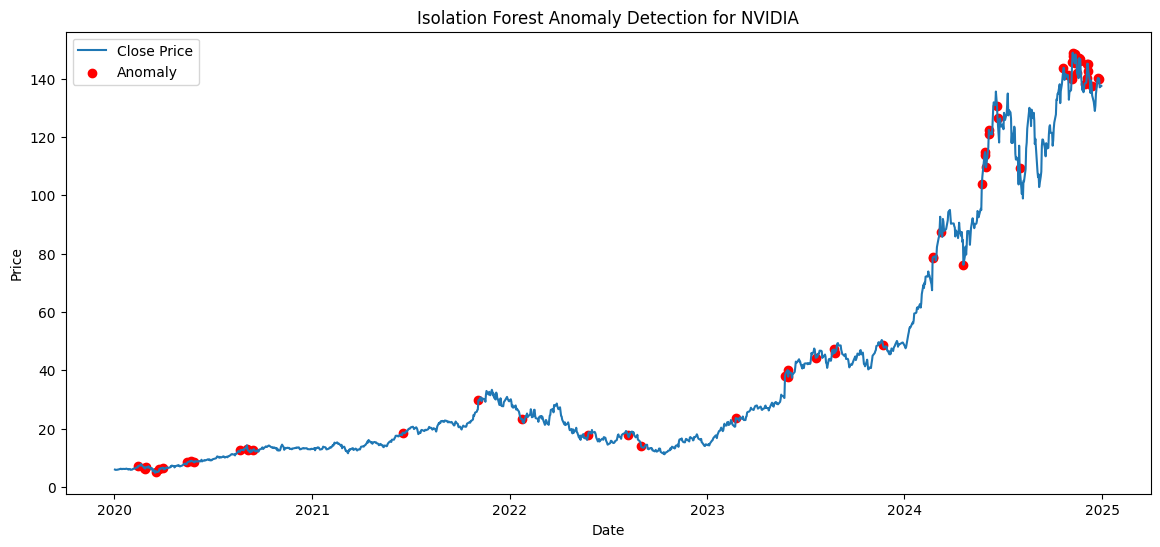

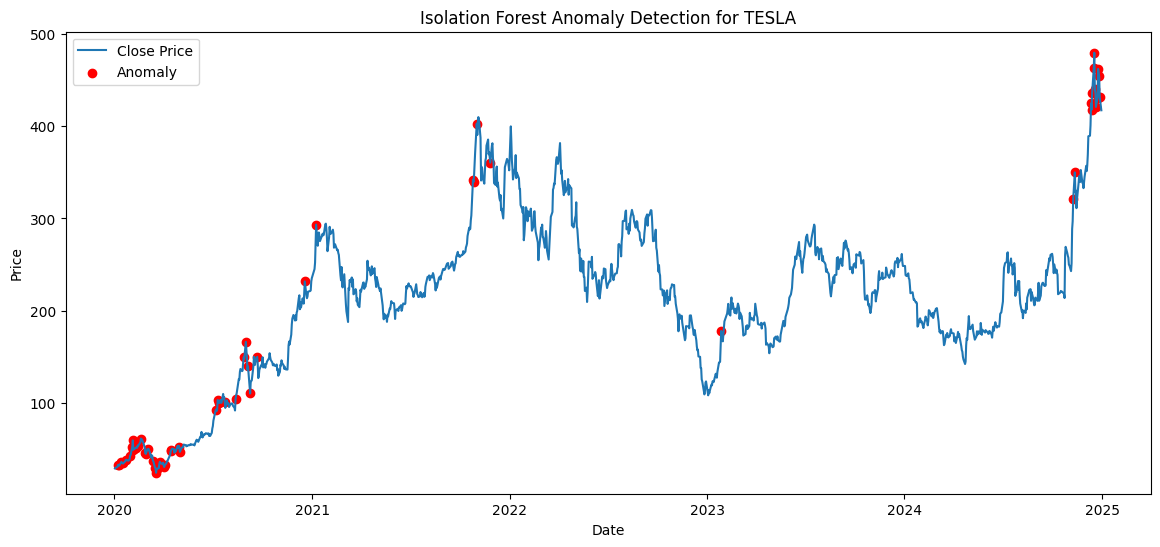

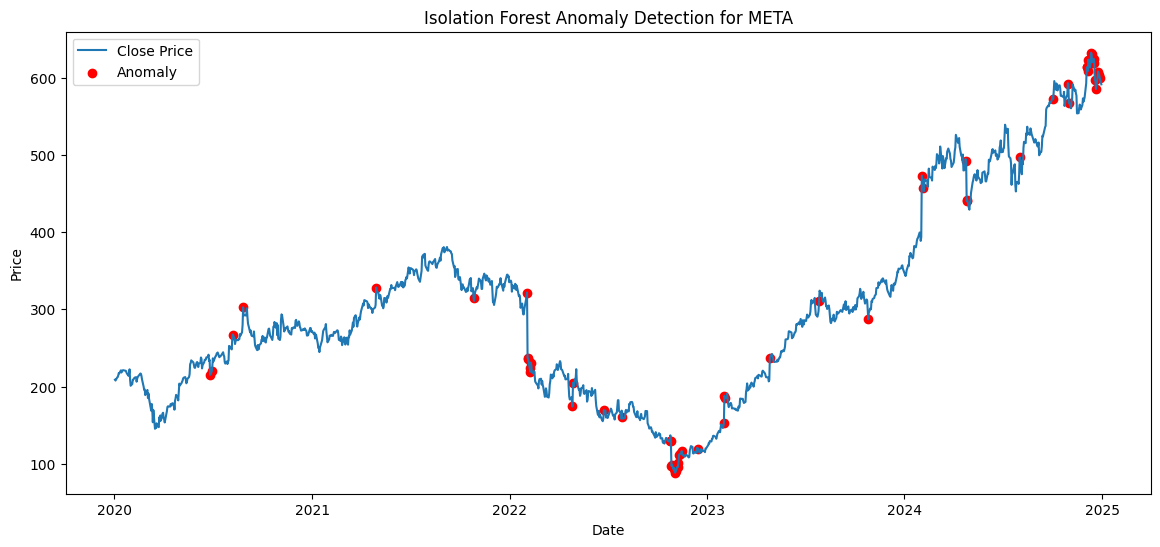

In [ ]:
def isolation_forest_anomaly_detection(data, company_name):
    iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
    data['Anomaly_IF'] = iso_forest.fit_predict(preprocess_data(data))
    # Mark anomalies: -1 indicates an anomaly
    data['Anomaly_IF'] = data['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.scatter(data[data['Anomaly_IF'] == 1]['Date'], data[data['Anomaly_IF'] == 1]['Close'], color='red', label='Anomaly')
    plt.title(f'Isolation Forest Anomaly Detection for {company_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

isolation_forest_anomaly_detection(nvidia_df, 'NVIDIA')
isolation_forest_anomaly_detection(tesla_df, 'TESLA')
isolation_forest_anomaly_detection(meta_df, 'META')


### DBSCAN

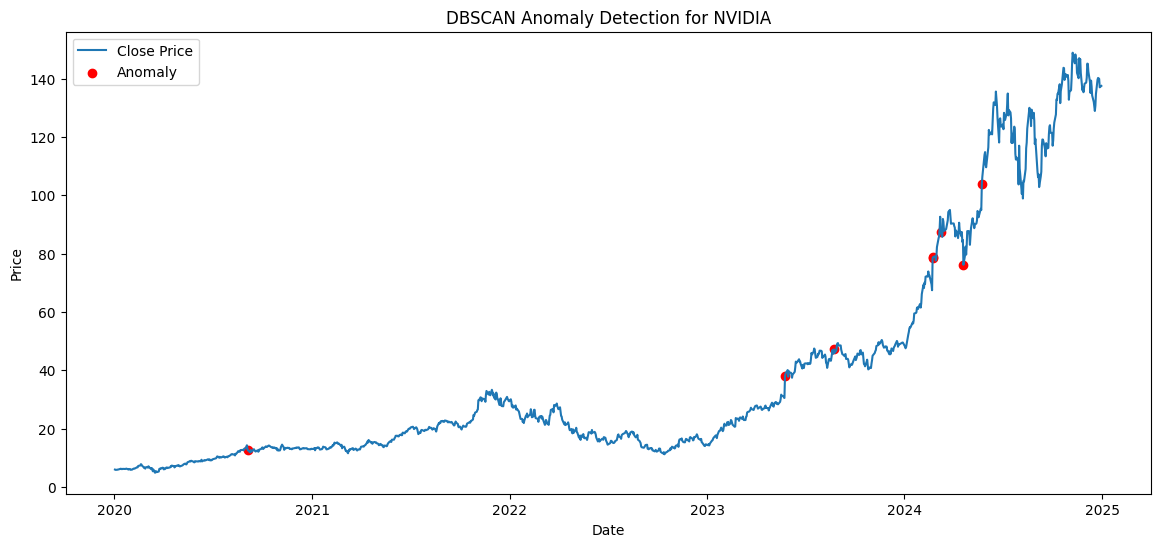

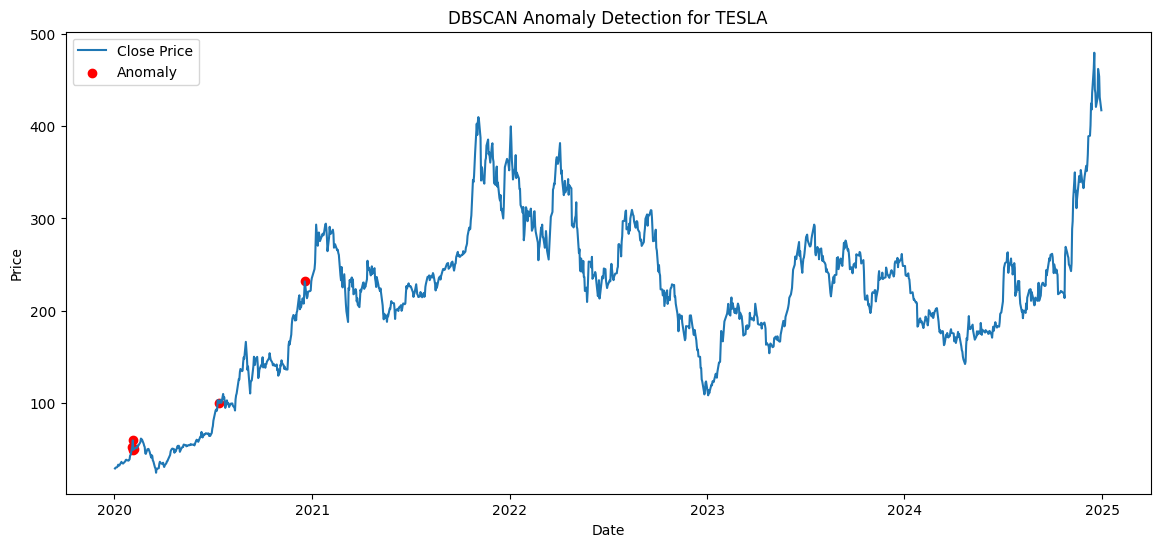

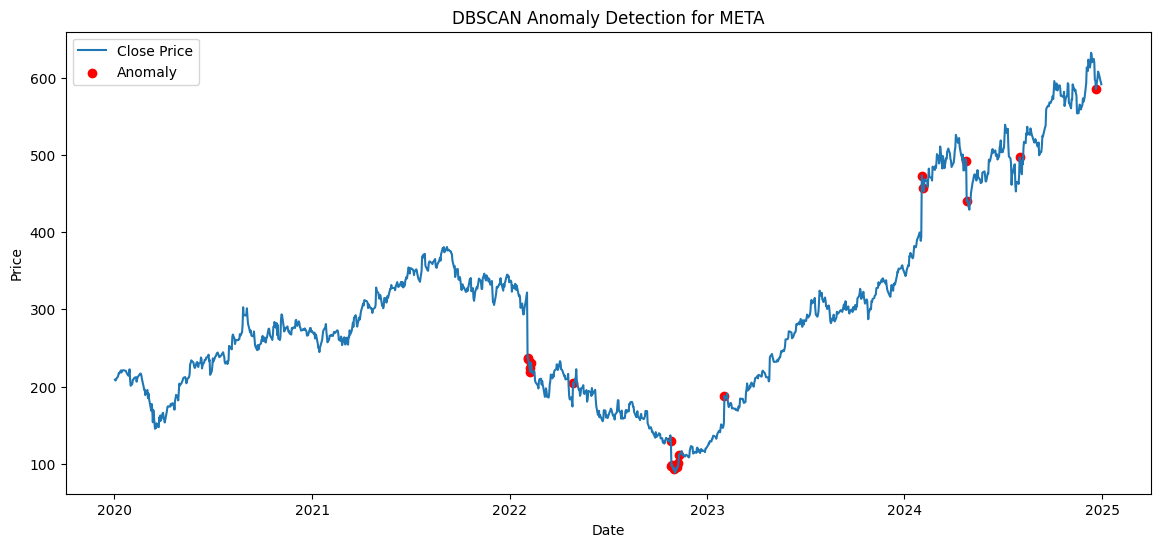

In [ ]:
def dbscan_anomaly_detection(data, company_name):
    dbscan = DBSCAN(min_samples=5, eps=0.5)  # Adjust min_samples and eps as needed
    data['Anomaly_DBSCAN'] = dbscan.fit_predict(preprocess_data(data))
    # Mark anomalies: -1 indicates an anomaly
    data['Anomaly_DBSCAN'] = data['Anomaly_DBSCAN'].apply(lambda x: 1 if x == -1 else 0)

    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.scatter(data[data['Anomaly_DBSCAN'] == 1]['Date'], data[data['Anomaly_DBSCAN'] == 1]['Close'], color='red', label='Anomaly')
    plt.title(f'DBSCAN Anomaly Detection for {company_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

dbscan_anomaly_detection(nvidia_df, 'NVIDIA')
dbscan_anomaly_detection(tesla_df, 'TESLA')
dbscan_anomaly_detection(meta_df, 'META')


## Time Series Analysis

### Prophet

Prophet is an open-source tool released by Facebook's Data Science team that produces time series forecasting data based on an additive model where a non-linear trend fits with seasonality and holiday effects.

#### NVIDIA

In [ ]:
# !pip install -q fbprophet
from prophet import Prophet

In [ ]:
import pandas as pd
nvidia_df = pd.read_csv('/content/NVDA_5yearsData.csv')
nvidia_df.head()

Date     Close      High       Low      Open     Volume
0  2020-01-02  5.972710  5.972710  5.893293  5.943831  237536000
1  2020-01-03  5.877112  5.920929  5.828068  5.852964  205384000
2  2020-01-06  5.901757  5.906985  5.757612  5.783752  262636000
3  2020-01-07  5.973208  6.019016  5.885077  5.930138  314856000
4  2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000

In [ ]:
nvidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Close   1257 non-null   float64
 2   High    1257 non-null   float64
 3   Low     1257 non-null   float64
 4   Open    1257 non-null   float64
 5   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])

In [ ]:
nvidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Close   1257 non-null   float64       
 2   High    1257 non-null   float64       
 3   Low     1257 non-null   float64       
 4   Open    1257 non-null   float64       
 5   Volume  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [ ]:
nvidia_df['ds'] = nvidia_df['Date']
nvidia_df['y'] = nvidia_df['Close']
nvidia_df.head()

Date     Close      High       Low      Open     Volume         ds  \
0 2020-01-02  5.972710  5.972710  5.893293  5.943831  237536000 2020-01-02   
1 2020-01-03  5.877112  5.920929  5.828068  5.852964  205384000 2020-01-03   
2 2020-01-06  5.901757  5.906985  5.757612  5.783752  262636000 2020-01-06   
3 2020-01-07  5.973208  6.019016  5.885077  5.930138  314856000 2020-01-07   
4 2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000 2020-01-08   

          y  
0  5.972710  
1  5.877112  
2  5.901757  
3  5.973208  
4  5.984411

<Axes: xlabel='ds'>

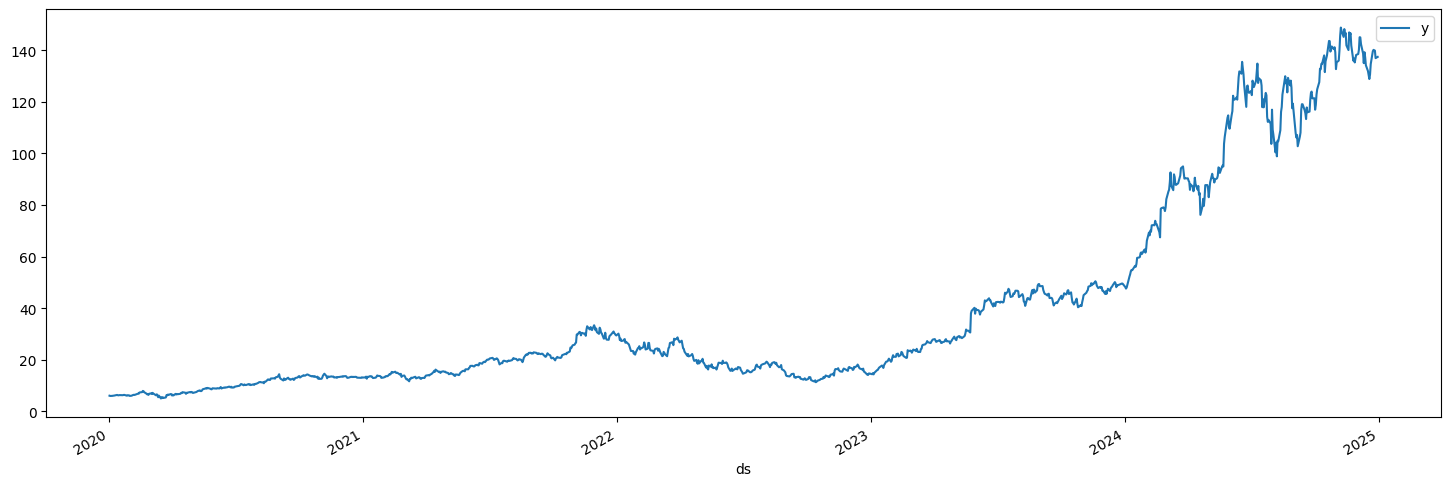

In [ ]:
nvidia_df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(nvidia_df)

1257

In [ ]:
nvidia_df = nvidia_df[['ds', 'y']]

In [ ]:
train = nvidia_df.iloc[:len(nvidia_df)-365]
test = nvidia_df.iloc[len(nvidia_df)-365:]

In [ ]:
print(train.shape)
print(test.shape)

(892, 2)
(365, 2)


In [ ]:
'''
        'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
m = Prophet()
m.fit(train)
# future = m.make_future_dataframe(periods=365) # Give me prediction of next 365 days
future = m.make_future_dataframe(periods=531) # we are adding more days becuz we want prediction untill 31-Dec-2024
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkhi1cpl/di3p9_mh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkhi1cpl/s4zu20dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90536', 'data', 'file=/tmp/tmpjkhi1cpl/di3p9_mh.json', 'init=/tmp/tmpjkhi1cpl/s4zu20dg.json', 'output', 'file=/tmp/tmpjkhi1cpl/prophet_modelfzaculz0/prophet_model-20250202140338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:03:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1418 2024-12-27  107.033186   76.678289  136.228187    77.065234   136.534199   
1419 2024-12-28  107.156099   76.173359  136.052743    77.084637   136.752079   
1420 2024-12-29  107.279012   75.925876  136.172567    77.104040   136.969960   
1421 2024-12-30  107.401924   76.942548  136.828865    77.123443   137.187840   
1422 2024-12-31  107.524837   76.986277  137.472255    77.142846   137.405721   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1418       -0.193900             -0.193900             -0.193900  0.261004   
1419       -1.131144             -1.131144             -1.131144 -0.609221   
1420       -1.196001             -1.196001             -1.196001 -0.609221   
1421       -0.438093             -0.438093             -0.438093  0.212178   
1422       -0.488744             -0.488744             -0.488744  0.224440   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1418      0.261004      0.261004 -0.454904     -0.454904     -0.454904   
1419     -0.609221     -0.609221 -0.521923     -0.521923     -0.521923   
1420     -0.609221     -0.609221 -0.586780     -0.586780     -0.586780   
1421      0.212178      0.212178 -0.650271     -0.650271     -0.650271   
1422      0.224440      0.224440 -0.713183     -0.713183     -0.713183   

      multiplicative_terms  multiplicative_terms_lower  \
1418                   0.0                         0.0   
1419                   0.0                         0.0   
1420                   0.0                         0.0   
1421                   0.0                         0.0   
1422                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1418                         0.0  106.839286  
1419                         0.0  106.024955  
1420                         0.0  106.083011  
1421                         0.0  106.963831  
1422                         0.0  107.036093

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1418 2024-12-27  106.839286   76.678289  136.228187
1419 2024-12-28  106.024955   76.173359  136.052743
1420 2024-12-29  106.083011   75.925876  136.172567
1421 2024-12-30  106.963831   76.942548  136.828865
1422 2024-12-31  107.036093   76.986277  137.472255

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
from statsmodels.tools.eval_measures import rmse, mse # Use mse instead of mean_squared_error
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # This import is fine

In [ ]:
predictions = forecast.iloc[-365:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Absolute Error between actual and  predicted values: ",mean_absolute_error(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())
print("Mean Value of Predicted Dataset", predictions.mean())

Root Mean Squared Error between actual and  predicted values:  23.03389073483995
Mean Absolute Error between actual and  predicted values:  20.38333394011172
Mean Value of Test Dataset: 88.33847695964657
Mean Value of Predicted Dataset 85.15586953109697


https://github.com/nicknochnack/TimeSeriesForecastingProphet/blob/main/Facebook%20Prophet.ipynb

https://github.com/nachi-hebbar/FB-Prophet-Time-Series-Forecasting/blob/main/FB_Prophet_YouTube.ipynb

https://github.com/pik1989/FBProphet/blob/main/FB_Prophet_Uni_%26_Multi.ipynb


https://colab.research.google.com/drive/1k7xSwaCeQ_AKbyQsAJNJnsZStm4mdYcJ?usp=sharing#scrollTo=0NrSa1lEyteD

#### TESLA

In [ ]:
# !pip install -q fbprophet
from prophet import Prophet

In [ ]:
import pandas as pd
tesla_df = pd.read_csv('/content/TSLA_5yearsData.csv')
tesla_df.head()

Date      Close       High        Low       Open     Volume
0  2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1  2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2  2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3  2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4  2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500

In [ ]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Close   1257 non-null   float64
 2   High    1257 non-null   float64
 3   Low     1257 non-null   float64
 4   Open    1257 non-null   float64
 5   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

In [ ]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Close   1257 non-null   float64       
 2   High    1257 non-null   float64       
 3   Low     1257 non-null   float64       
 4   Open    1257 non-null   float64       
 5   Volume  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [ ]:
tesla_df['ds'] = tesla_df['Date']
tesla_df['y'] = tesla_df['Close']
tesla_df.head()

Date      Close       High        Low       Open     Volume  \
0 2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500   
1 2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500   
2 2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000   
3 2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500   
4 2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500   

          ds          y  
0 2020-01-02  28.684000  
1 2020-01-03  29.534000  
2 2020-01-06  30.102667  
3 2020-01-07  31.270666  
4 2020-01-08  32.809334

<Axes: xlabel='ds'>

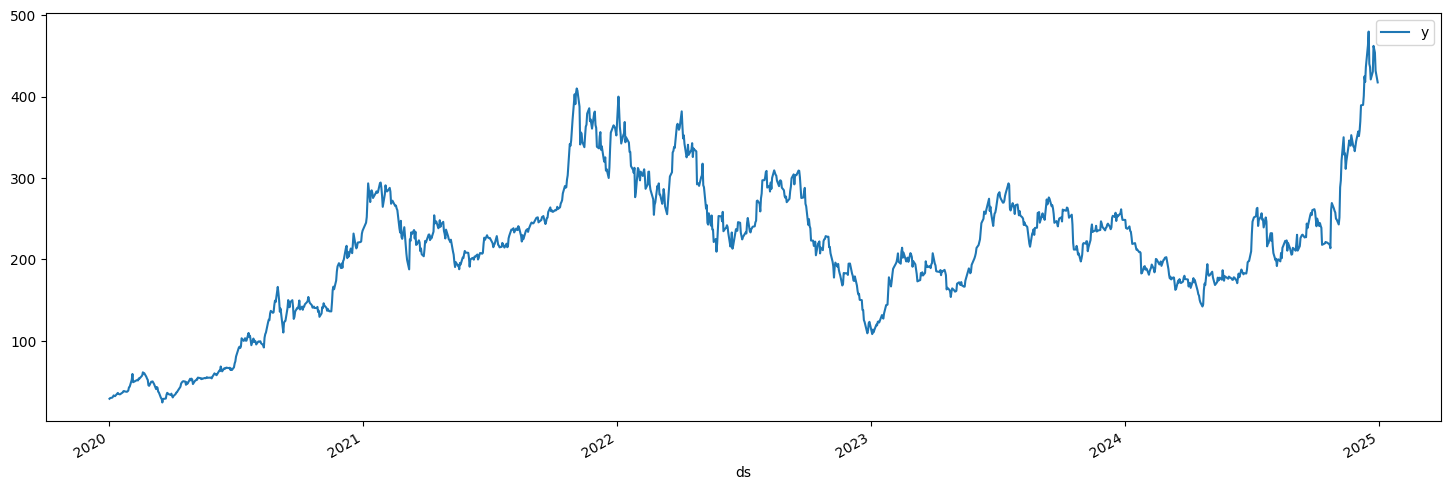

In [ ]:
tesla_df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(tesla_df)

1257

In [ ]:
tesla_df = tesla_df[['ds', 'y']]

In [ ]:
train = tesla_df.iloc[:len(tesla_df)-365]
test = tesla_df.iloc[len(tesla_df)-365:]

In [ ]:
print(train.shape)
print(test.shape)

(892, 2)
(365, 2)


In [ ]:
'''
        'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
m = Prophet()
m.fit(train)
# future = m.make_future_dataframe(periods=365) # Give me prediction of next 365 days
future = m.make_future_dataframe(periods=531) # we are adding more days becuz we want prediction untill 31-Dec-2024
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo94g9f_/fhj8b8kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo94g9f_/t28a0quh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95833', 'data', 'file=/tmp/tmpoo94g9f_/fhj8b8kc.json', 'init=/tmp/tmpoo94g9f_/t28a0quh.json', 'output', 'file=/tmp/tmpoo94g9f_/prophet_model53pzpt5x/prophet_model-20250202033406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:34:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:34:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1418 2024-12-27  200.978952   84.244838  300.240263   108.642187   292.112476   
1419 2024-12-28  200.964369   99.568888  315.237286   108.376213   292.401296   
1420 2024-12-29  200.949786  107.305287  311.387954   107.959671   292.690116   
1421 2024-12-30  200.935203   96.944862  305.032863   107.623016   292.978937   
1422 2024-12-31  200.920620   93.556607  302.752387   106.985997   293.267757   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1418       -9.482920             -9.482920             -9.482920 -4.857565   
1419        5.877890              5.877890              5.877890  9.157921   
1420        7.380285              7.380285              7.380285  9.157913   
1421       -2.182069             -2.182069             -2.182069 -2.030140   
1422       -2.332249             -2.332249             -2.332249 -3.892973   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1418     -4.857565     -4.857565 -4.625355     -4.625355     -4.625355   
1419      9.157921      9.157921 -3.280031     -3.280031     -3.280031   
1420      9.157913      9.157913 -1.777628     -1.777628     -1.777628   
1421     -2.030140     -2.030140 -0.151929     -0.151929     -0.151929   
1422     -3.892973     -3.892973  1.560724      1.560724      1.560724   

      multiplicative_terms  multiplicative_terms_lower  \
1418                   0.0                         0.0   
1419                   0.0                         0.0   
1420                   0.0                         0.0   
1421                   0.0                         0.0   
1422                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1418                         0.0  191.496033  
1419                         0.0  206.842260  
1420                         0.0  208.330071  
1421                         0.0  198.753134  
1422                         0.0  198.588371

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1418 2024-12-27  191.496033   84.244838  300.240263
1419 2024-12-28  206.842260   99.568888  315.237286
1420 2024-12-29  208.330071  107.305287  311.387954
1421 2024-12-30  198.753134   96.944862  305.032863
1422 2024-12-31  198.588371   93.556607  302.752387

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
from statsmodels.tools.eval_measures import rmse, mse # Use mse instead of mean_squared_error
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # This import is fine

In [ ]:
predictions = forecast.iloc[-365:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Absolute Error between actual and  predicted values: ",mean_absolute_error(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())
print("Mean Value of Predicted Dataset", predictions.mean())

Root Mean Squared Error between actual and  predicted values:  65.5385191088948
Mean Absolute Error between actual and  predicted values:  42.56274611811989
Mean Value of Test Dataset: 234.26772607254657
Mean Value of Predicted Dataset 203.56226014625986


https://github.com/nicknochnack/TimeSeriesForecastingProphet/blob/main/Facebook%20Prophet.ipynb

https://github.com/nachi-hebbar/FB-Prophet-Time-Series-Forecasting/blob/main/FB_Prophet_YouTube.ipynb

https://github.com/pik1989/FBProphet/blob/main/FB_Prophet_Uni_%26_Multi.ipynb


https://colab.research.google.com/drive/1k7xSwaCeQ_AKbyQsAJNJnsZStm4mdYcJ?usp=sharing#scrollTo=0NrSa1lEyteD

### LSTM

A Long Short-Term Memory (LSTM) model is a type of artificial neural network that can process sequential data, such as text, speech, and time series. LSTMs are used in many applications, including speech recognition, language translation, and time series forecasting.

#### META

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(7)
tf.random.set_seed(7)


# Load data
meta_df = pd.read_csv('/content/META_5yearsData.csv')
meta_df.head()

Date       Close        High         Low        Open    Volume
0  2020-01-02  208.981705  208.991661  205.485067  205.963236  12077100
1  2020-01-03  207.875916  209.599328  206.162460  206.421480  11188400
2  2020-01-06  211.790985  211.970293  205.734120  205.913428  17058900
3  2020-01-07  212.249222  213.763442  210.944209  212.010145  14912400
4  2020-01-08  214.401001  215.417124  211.800932  212.189448  13475000

In [ ]:
meta_df = meta_df[['Date', 'Close']]
meta_df.head()

Date       Close
0  2020-01-02  208.981705
1  2020-01-03  207.875916
2  2020-01-06  211.790985
3  2020-01-07  212.249222
4  2020-01-08  214.401001

In [ ]:
# Convert Date to datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

meta_df['Date'] = meta_df['Date'].apply(str_to_datetime)
meta_df.index = meta_df.pop('Date')

# meta_df['Date'] = pd.to_datetime(meta_df['Date'])
# meta_df.set_index('Date', inplace=True)

<ipython-input-232-88c65598a35d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# # # Normalize the data
# scaler = MinMaxScaler()
# meta_df['Close'] = scaler.fit_transform(meta_df[['Close']])


In [ ]:

# Create windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

windowed_df = df_to_windowed_df(meta_df, '2020-01-07', '2024-12-30', n=3)


In [ ]:

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)


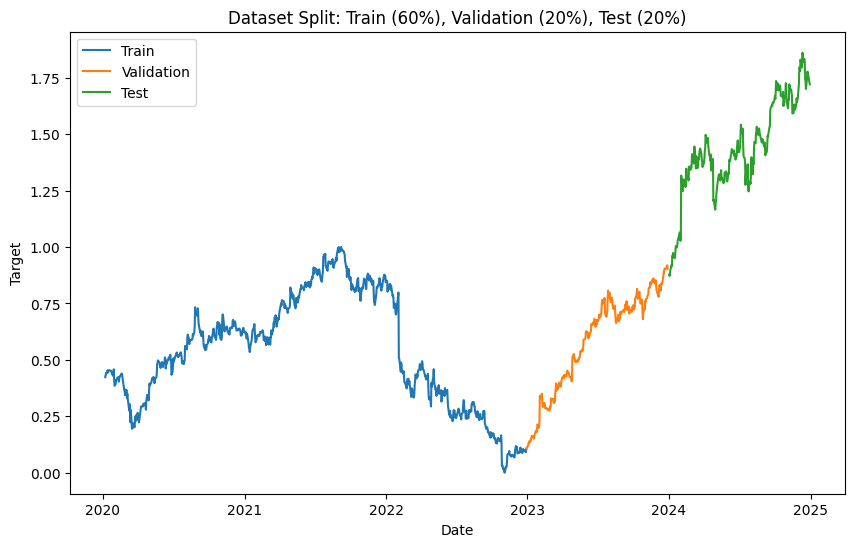

In [ ]:
# Split data
N = len(dates)
q_train = int(N * 0.6)
q_val = int(N * 0.8)

dates_train, X_train, y_train = dates[:q_train], X[:q_train], y[:q_train]
dates_val,   X_val,   y_val   = dates[q_train:q_val], X[q_train:q_val], y[q_train:q_val]
dates_test,  X_test,  y_test  = dates[q_val:], X[q_val:], y[q_val:]

# Normalize the data
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train.reshape(-1, X_train.shape[2]))

# Transform all data using the fitted scaler
X_train = scaler.transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

y_train = scaler.transform(y_train.reshape(-1, 1)).reshape(-1)
y_val = scaler.transform(y_val.reshape(-1, 1)).reshape(-1)
y_test = scaler.transform(y_test.reshape(-1, 1)).reshape(-1)


# Plot the splits
plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train, label='Train')
plt.plot(dates_val, y_val, label='Validation')
plt.plot(dates_test, y_test, label='Test')
plt.legend()
plt.title('Dataset Split: Train (60%), Validation (20%), Test (20%)')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()



In [ ]:
# Build the model
model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(32, activation='leaky_relu'),
    layers.Dense(8, activation='leaky_relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=200,
                    callbacks=[early_stopping])



Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3352 - mean_absolute_error: 0.5261 - val_loss: 0.3351 - val_mean_absolute_error: 0.5400
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2887 - mean_absolute_error: 0.4836 - val_loss: 0.2719 - val_mean_absolute_error: 0.4823
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2314 - mean_absolute_error: 0.4267 - val_loss: 0.2018 - val_mean_absolute_error: 0.4095
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1652 - mean_absolute_error: 0.3534 - val_loss: 0.1249 - val_mean_absolute_error: 0.3152
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0978 - mean_absolute_error: 0.2643 - val_loss: 0.0545 - val_mean_absolute_error: 0.2034
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0409 - mean_absolute_error: 0.1664 - val_loss: 0.0156 - val_mean_absolute_error: 0.1110
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0184 - mean_absolute_error: 0.1135 - v

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


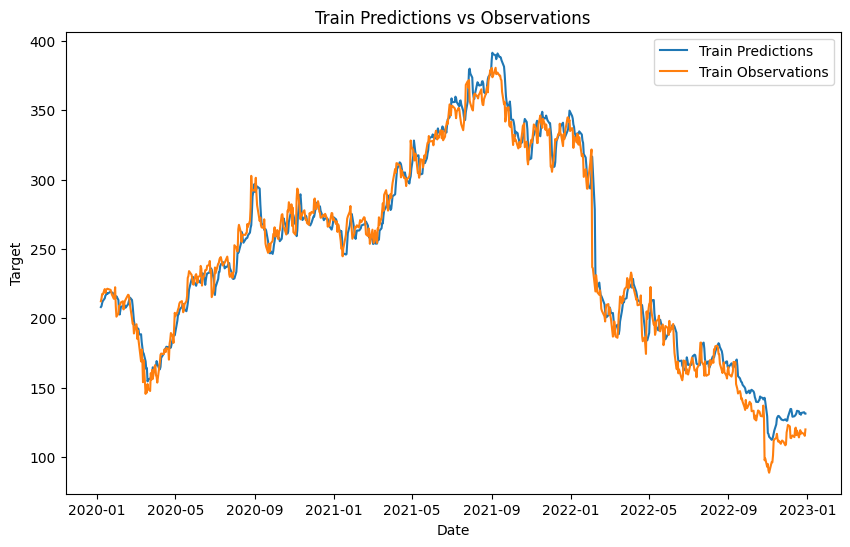

In [ ]:

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_train = scaler.inverse_transform(y_pred_train)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))

# Plot the test predictions
plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_pred_train, label='Train Predictions')
plt.plot(dates_train, y_train, label='Train Observations')
plt.legend()
plt.title('Train Predictions vs Observations')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


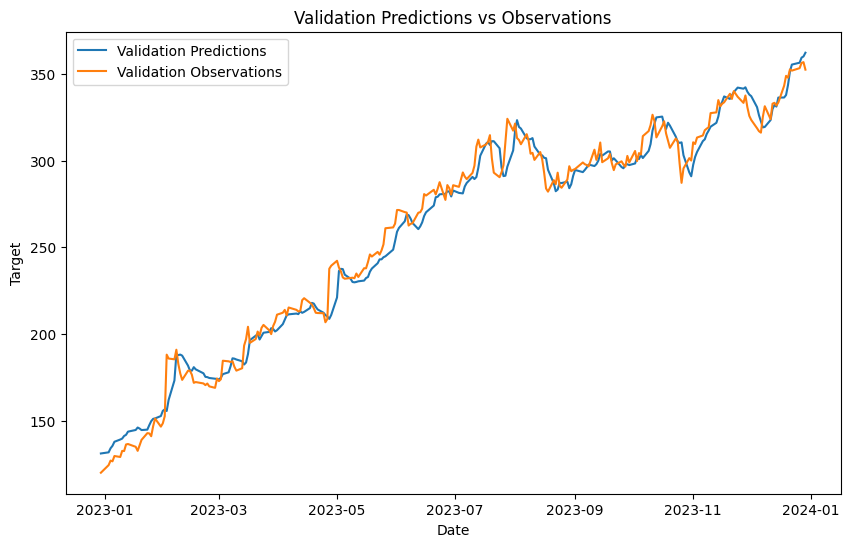

In [ ]:

# Evaluate the model
y_pred_val = model.predict(X_val)
y_pred_val = scaler.inverse_transform(y_pred_val)
y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

# Plot the test predictions
plt.figure(figsize=(10, 6))
plt.plot(dates_val, y_pred_val, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')
plt.legend()
plt.title('Validation Predictions vs Observations')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error: 4104.65771484375
Mean Absolute Error: 56.811279296875


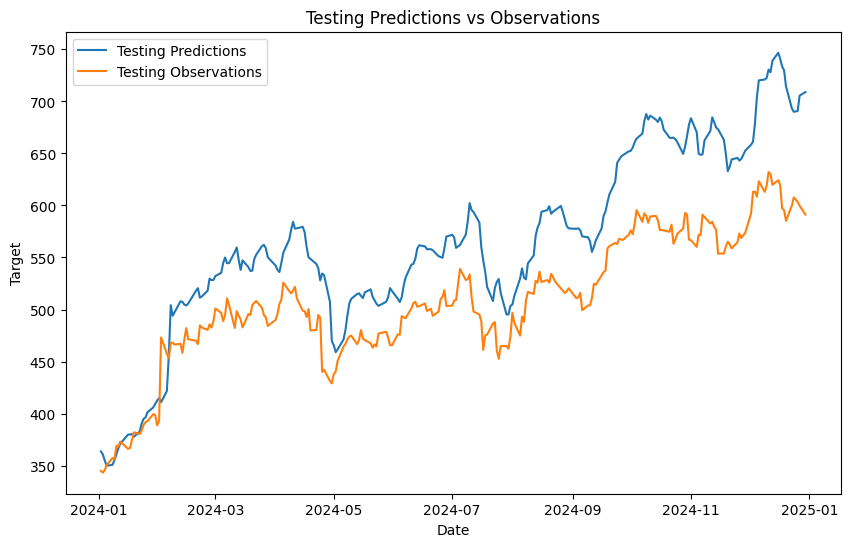

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot the test predictions
plt.figure(figsize=(10, 6))
plt.plot(dates_test, y_pred, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.legend()
plt.title('Testing Predictions vs Observations')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()


In [ ]:
print("Mean Value of Test Dataset:", y_test.mean())
print("Mean Value of Predicted Dataset", y_pred.mean())

Mean Value of Test Dataset: 507.97113
Mean Value of Predicted Dataset 563.80865


## Conclusion

Overall, this notebook contains analysis on stock data of 3 big companies, and also we used 2 different models: Prophet and LSTM model. Both models perform well. We used Prophet on NVIDIA and TESLA and used LSTM on META data.